In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# rainforest classifier
from sklearn.ensemble import RandomForestClassifier

# linear regession classifier
from sklearn.linear_model import LogisticRegression

# knn classifier
from sklearn.neighbors import KNeighborsClassifier
import wrangle as w
import explore as e
import model as m


# Acquire
* Aquire dataset from Codeup database
* It contained 7043 rows and 26 columns before cleaning
* Each row represents a customer at Telco
* Each column represents a feature of those customers

# Prepare
- Prepare Actions:

    * Removed columns that did not contain useful information
    * Renamed columns to promote readability
    * Checked for nulls in the data (there were nulls within churn_month column, which was dropped)
    * Checked that column data types were appropriate
    * Removed white space from total_charge columns with 0's and coverted type to float
    * Added automatic_payment column, which divides the four payment types in payment_type column into two categories: automatic or non-automatic
    * Removed features:
        - customer_id            
        - senior_citizen                         
        - phone_service            
        - monthly_charges        
        - total_charges          
        - payment_type           
      
    * Encoded categorical variables
    * Split data into train, validate and test (approx. 60/20/20), stratifying on 'churn'
    * Outliers have not been removed for this iteration of the project

# Data Dictionary 

In [2]:
# acquiring, cleaning, and adding features to data
df = w.prep_telco()
df

# splitting data into train, validate, and test
target = "churn"
train, validate, test = w.split_data(df,target)


# Summarize df 

In [3]:
# overview of data
train.head()

,partner,dependents,paperless_billing,automatic_payment,churn,gender,tenure
5911,0,1,1,1,0,1,26
2479,1,0,0,0,0,0,47
5889,0,0,1,0,1,0,1
6087,0,0,1,1,0,1,69
785,0,0,0,1,0,0,51


# Explore

## How often are customers' churning?

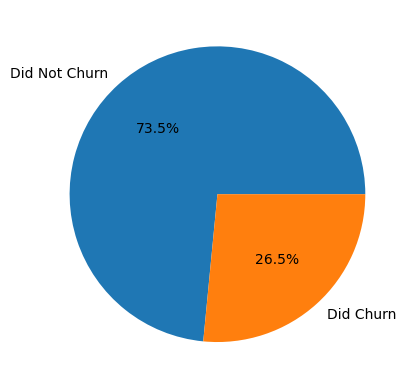

In [4]:
e.churn_pie(train)

* Approximately 27% of customers' in the training data have churned

## Question 1: What's the relationship between churn and automatic payment?

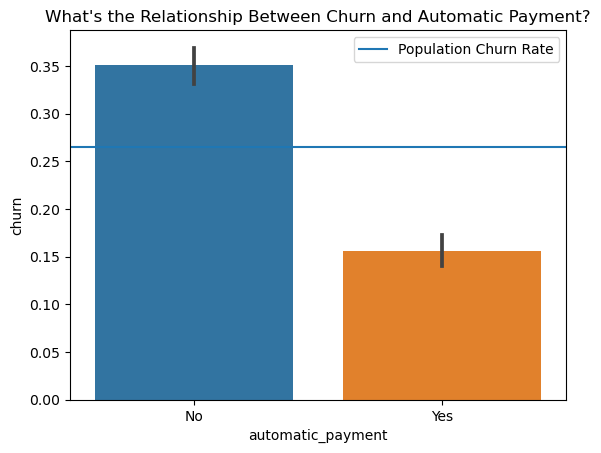

In [5]:
graph_title_Q1 = "What's the Relationship Between Churn and Automatic Payment?"
feature_Q1 = "automatic_payment"

e.relationship_churn(train, graph_title_Q1, feature_Q1, target)

**I will use chi-square to investigate whether churning and customers' with automatic payment are related**

* I will use a confidence interval of 95%
* The alpha is .05


* $H_o$: 'Churn' and 'Automatic Payment' are independent.
* $H_a$: 'Churn' and 'Automatic Payment' are related.

In [6]:
# Chi squared to compare proportions, define confidence
# alpha is set to 0.05
alpha = 0.05

null_hypothesis_Q1 = "'Churn' and 'Automatic Payments' are independent"
alternative_hypothesis_Q1 = "'Churn' and 'Automatic Payments'are related"

e.cross_function(train, target, feature_Q1, null_hypothesis_Q1, alternative_hypothesis_Q1)

Reject the null hypothesis: 'Churn' and 'Automatic Payments' are independent
Sufficient evidence to move forward understanding that, 'Churn' and 'Automatic Payments'are related
 chi^2 = 201.00756246968632 p = 1.2588150001387785e-45


**The p-value is greater than the alpha. Therefore, we have evidence to support that 'Churn' and 'Automatic Payments'are related. Based on this, I believe that using the 'Automatic Payment' feature in modeling will likely have a small positive impact on the model's accuracy.**

# Question 2:  What's the relationship between churn and paperless billing?

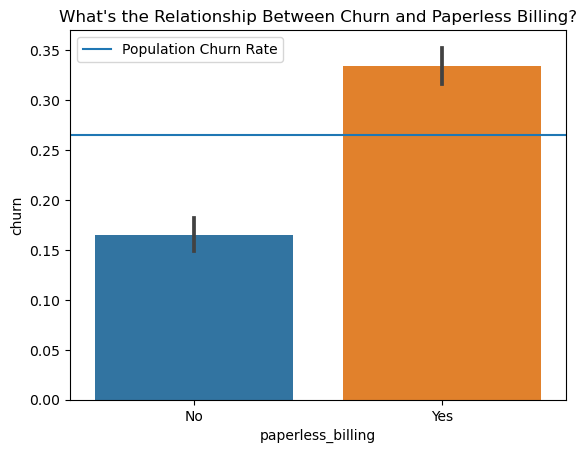

In [7]:
graph_title_Q2 = "What's the Relationship Between Churn and Paperless Billing?"
feature_Q2 = "paperless_billing"

e.relationship_churn(train, graph_title_Q2, feature_Q2, target)

**I will use chi-square to investigate whether churning and customers' with paperless billing are related**

* I will use a confidence interval of 95%
* The alpha is .05


* $H_o$: 'Churn' and 'Paperless Billing' are independent.
* $H_a$: 'Churn' and 'Paperless Billing' are related.

In [8]:
# Chi squared to compare proportions, define confidence
null_hypothesis_Q2 = "'Churn' and 'Paperless Billing' are independent."
alternative_hypothesis_Q2 = "'Churn' and 'Paperless Billing' are related.'"

e.cross_function(train, target, feature_Q2, null_hypothesis_Q2, alternative_hypothesis_Q2)

Reject the null hypothesis: 'Churn' and 'Paperless Billing' are independent.
Sufficient evidence to move forward understanding that, 'Churn' and 'Paperless Billing' are related.'
 chi^2 = 148.58446697144495 p = 3.5348504574964642e-34


**The p-value is greater than the alpha. Therefore, we have evidence to support that 'Churn' and 'Paperless Billing' are related. Based on this, I believe that using the 'Paperless Billing' feature in modeling will likely have a small positive impact on the model's accuracy.**

# Question 3: What's the Relationship Between Churn and Customers' with a Partner?

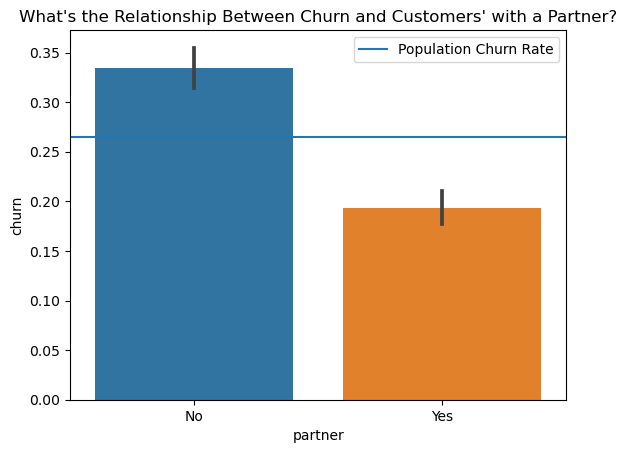

In [9]:
graph_title_Q3 = "What's the Relationship Between Churn and Customers' with a Partner?"
feature_Q3 = "partner"

e.relationship_churn(train, graph_title_Q3, feature_Q3, target)

**I will use chi-square to investigate whether churning and customers' with a Partner?**

* I will use a confidence interval of 95%
* The alpha is .05


* $H_o$: 'Churn' and 'Partner' are independent.
* $H_a$: 'Churn' and 'Partner' are related.

In [10]:
# Chi squared to compare proportions, define confidence
null_hypothesis_Q3 = "'Churn' and 'Partners' are independent"
alternative_hypothesis_Q3 = "'Churn' and 'Partners' are related"

e.cross_function(train, target, feature_Q3, null_hypothesis_Q3, alternative_hypothesis_Q3)

Reject the null hypothesis: 'Churn' and 'Partners' are independent
Sufficient evidence to move forward understanding that, 'Churn' and 'Partners' are related
 chi^2 = 106.63124069338238 p = 5.362120825511991e-25


**The p-value is greater than the alpha. Therefore, we have evidence to support that 'Churn' and 'Partners' are related. Based on this, I believe that using the 'Partners' feature in modeling will likely have a small positive impact on the model's accuracy.**

# Question 4: What's the relationship between churn and customers' with dependents?

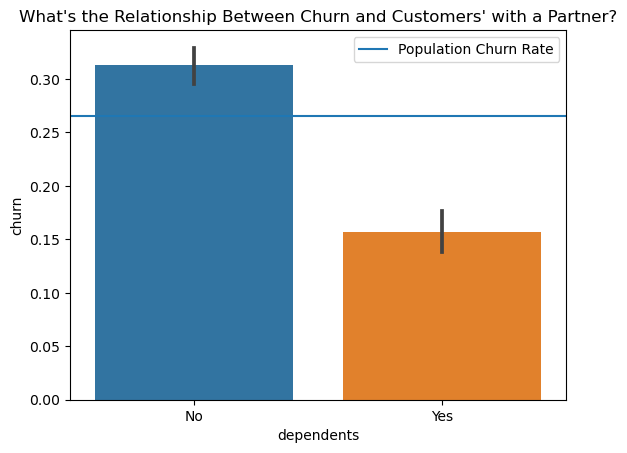

In [11]:
graph_title_Q4 = "What's the Relationship Between Churn and Customers' with Dependents"
feature_Q4 = "dependents"

e.relationship_churn(train, graph_title_Q3, feature_Q4, target)

**I will use chi-square to investigate whether churning and customers' with Dependents?**

* I will use a confidence interval of 95%
* The alpha is .05


* $H_o$: 'Churn' and 'Dependents' are independent.
* $H_a$: 'Churn' and 'Dependents' are related.

In [12]:
alpha = 0.05

null_hypothesis_Q4 = "'Churn' and 'Dependents' are independent."
alternative_hypothesis_Q4 = "'Churn' and 'Dependents' are related."

e.cross_function(train, target, feature_Q4, null_hypothesis_Q4, alternative_hypothesis_Q4)

Reject the null hypothesis: 'Churn' and 'Dependents' are independent.
Sufficient evidence to move forward understanding that, 'Churn' and 'Dependents' are related.
 chi^2 = 111.74045071817626 p = 4.0728740930257527e-26


**The p-value is greater than the alpha. Therefore, we have evidence to support that 'Churn' and 'Dependents' are related. Based on this, I believe that using the 'Dependents' feature in modeling will likely have a small positive impact on the model's accuracy.**

# Exploration Summary

* "Automatic Payment" was found to be a driver of "Churn"
* "Paperless Billing" was found to be a driver of "Churn"
* "Partner" was found to be a driver of "Churn"
* "Dependents" was found to be a driver of "Churn"

# Features continuing to modeling

* "Automatic Payment" was found to be a driver of "Churn" (small difference in churn percentage, but relationship to churn is statistically significant)
* "Paperless Billing" was found to be a driver of "Churn" (small difference in churn percentage, but relationship to churn is statistically significant)
* "Partner" was found to be a driver of "Churn" (small difference in churn percentage, but relationship to churn is statistically significant)
* "Dependents" was found to be a driver of "Churn" (small difference in churn percentage, but relationship to churn is statistically significant)


# Modeling

* My evaluation metric will use accuracy.
* Non-churn is approximately 73% of the data.

* Assuming non-churn for every customer, the baseline accuracy is 73%, and will continue to use for this project.
* I will be evaluating models developed using three different model types and various hyperparameter configurations.
* Models will be evaluated on train and validate data.
* The model that performs the best will then be evaluated on test data.

* positive class:  not churned
* negative class:  churned

In [13]:
# baseline accuracy 
baseline_accuracy = (train.churn == 0).mean()
#  prep data for modeling
x_train, y_train, x_validate, y_validate, x_test, y_test = m.create_x_y(train, validate, test, target)

# Decision Tree Model  

In [14]:
m.best_tree(x_train, y_train, x_validate, y_validate)


    Accuracy of Decision Tree classifier on training set: 0.77
    Accuracy of Decision Tree classifier on validation set: 0.77
    


* The Decision Tree is approximately 4% greater than the baseline.

# Random Forest model

In [15]:
m.best_forest(x_train, y_train, x_validate, y_validate)


    Accuracy of Decision Tree classifier on training set: 0.78
    Accuracy of Decision Tree classifier on validation set: 0.778
    


* The Random Forest is approximately 4-5% greater than the baseline.

# Linear Regression Model

In [16]:
m.logit_accuracy(x_train, y_train, x_validate, y_validate)



    Accuracy of Logistic Regression on training set: 0.769
    Accuracy of Logistic Regression on validation set: 0.774
    


* The Linear Regression is approximately 3-4% greater than the baseline.

# KNN Model

In [17]:
m.best_knn(x_train, y_train, x_validate, y_validate)


    Accuracy of KNN on training set: 0.783
    Accuracy of KNN on validation set: 0.752
    


In [18]:
* The KNN Model  Regression is approximately 3-4% greater than the baseline.

SyntaxError: invalid syntax (3093856375.py, line 1)

# Comparing Models

In [ ]:
Decision Tree, Random Forest, and Logistic Regression models all performed about equal or greater than the baseline on train and validate
The KNN model performed slightly better on train data but was worse on validate data. It is likely overfit.
Because the results of the Decision Tree, Random Forest, and Logistic Regression models were all very similar I could proceed to test with any of these models.
I have chosen to move forward with the Logistic Regression model

# Test Model 

In [ ]:
# Test Model
print(f'''
    Accuracy of Logistic Regression classifier on training set: {round(logit.score(x_train, y_train),2)}
    Accuracy of Logistic Regression classifier on validation set: {round(logit.score(x_validate, y_validate),2)}
    Accuracy of Logistic Regression classifier on test set: {round(logit.score(x_test, y_test),2)}
    
''')
